In [37]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,SimpleImputer, IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor


In [38]:
data = pd.read_csv("../data/elecciones_haiti.csv")

In [39]:
data.head()

,Presupuesto Otorgado,Gasto de marketing,Gasto campaña,Número de afiliados,Número de competidores,Número de seguidores de twitter,Votos del partido en la elección pasada,Número de votos del candidato,Ingreso mensual,Edad,Ganador,ID_Candidato,Fecha
0,16000000.0,9795154.0,6162225.0,397.0,4.0,33117.0,261271.0,47.0,138741.0,55.0,1,CAND-108026,2006-06-30
1,15000000.0,1052076.0,14994226.0,209.0,4.0,88453.0,244314.0,67.0,98240.0,49.0,0,CAND-102856,2000-06-30
2,16000000.0,1755718.0,13985634.0,NaN,3.0,67925.0,254029.0,63.0,NaN,49.0,0,CAND-110135,2021-06-30
3,13000000.0,7400252.0,8620721.0,327.0,6.0,43029.0,234126.0,53.0,111968.0,57.0,0,CAND-110769,2003-06-30
4,15000000.0,3707232.0,12471452.0,356.0,4.0,58636.0,245542.0,78.0,145084.0,56.0,1,CAND-114800,2000-06-30


In [40]:
data["Ganador"].value_counts(1)

1    0.5004
0    0.4996
Name: Ganador, dtype: float64

In [4]:
data.head()

,Presupuesto Otorgado,Gasto de marketing,Gasto campaña,Número de afiliados,Número de competidores,Número de seguidores de twitter,Votos del partido en la elección pasada,Número de votos del candidato,Ingreso mensual,Edad,Ganador,ID_Candidato,Fecha
0,16000000.0,9795154.0,6162225.0,397.0,4.0,33117.0,261271.0,47.0,138741.0,55.0,1,CAND-108026,2006-06-30
1,15000000.0,1052076.0,14994226.0,209.0,4.0,88453.0,244314.0,67.0,98240.0,49.0,0,CAND-102856,2000-06-30
2,16000000.0,1755718.0,13985634.0,NaN,3.0,67925.0,254029.0,63.0,NaN,49.0,0,CAND-110135,2021-06-30
3,13000000.0,7400252.0,8620721.0,327.0,6.0,43029.0,234126.0,53.0,111968.0,57.0,0,CAND-110769,2003-06-30
4,15000000.0,3707232.0,12471452.0,356.0,4.0,58636.0,245542.0,78.0,145084.0,56.0,1,CAND-114800,2000-06-30


In [41]:
import missingno as msno

<AxesSubplot:>

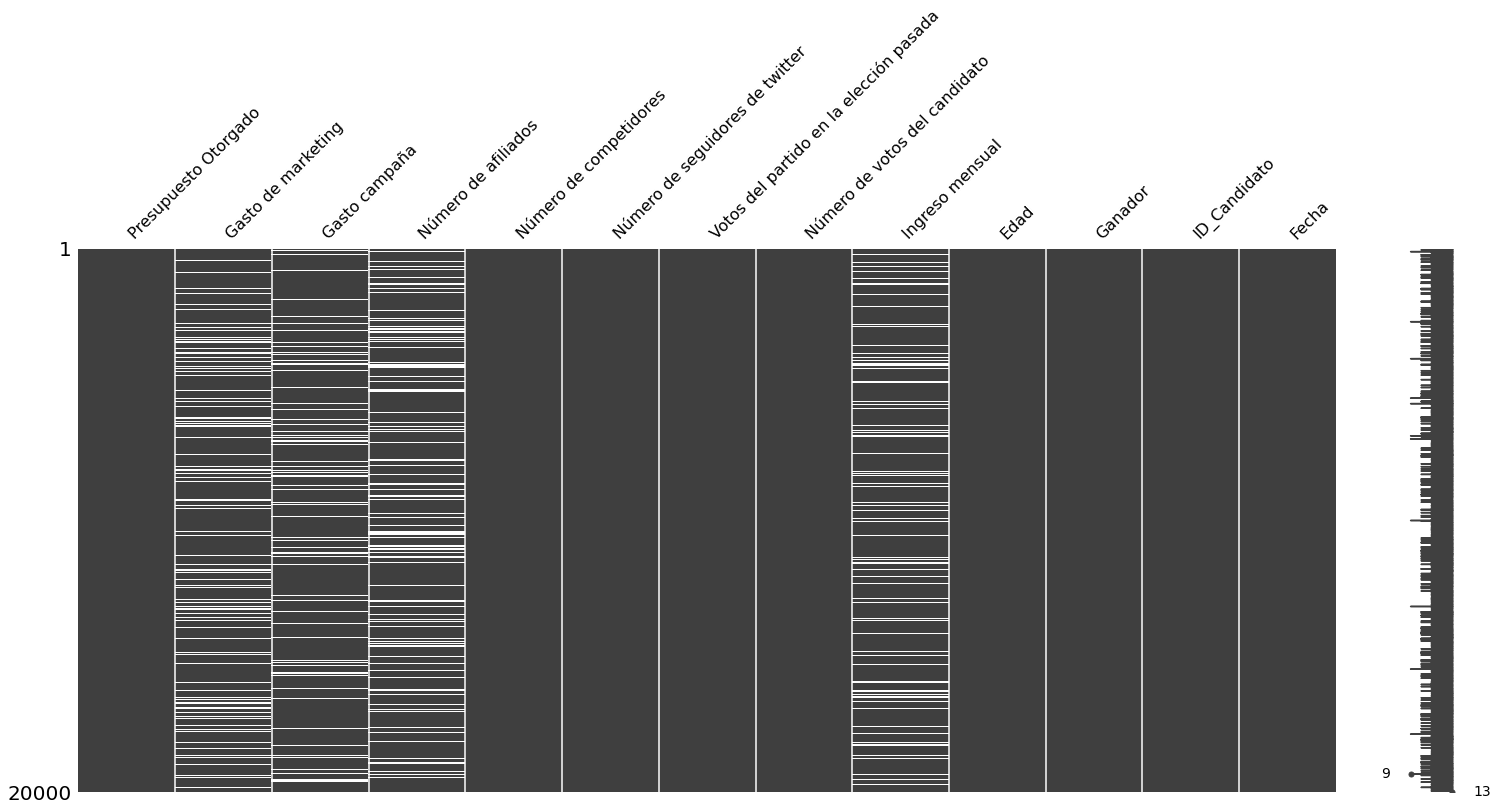

In [42]:
msno.matrix(data)

In [43]:
data.isnull().sum()/data.shape[0]

Presupuesto Otorgado                       0.00000
Gasto de marketing                         0.14330
Gasto campaña                              0.13795
Número de afiliados                        0.17510
Número de competidores                     0.00000
Número de seguidores de twitter            0.00000
Votos del partido en la elección pasada    0.00000
Número de votos del candidato              0.00000
Ingreso mensual                            0.15100
Edad                                       0.00000
Ganador                                    0.00000
ID_Candidato                               0.00000
Fecha                                      0.00000
dtype: float64

In [44]:
data.drop(columns=['ID_Candidato','Fecha'],inplace=True)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X=data.drop(columns=['Ganador'])
y=data['Ganador']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [48]:
variables_missing=['Gasto de marketing','Gasto campaña','Número de afiliados','Ingreso mensual']

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
steps_mean=[('imputer',SimpleImputer(fill_value="mean")),('model',LogisticRegression())]

In [51]:
pipe_mean=Pipeline(steps=steps_mean)

In [52]:
pipe_mean.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(fill_value='mean')),
                ('model', LogisticRegression())])

In [53]:
pipe_mean.score(X_test,y_test)

0.8216

In [54]:
steps_median=[('imputer',SimpleImputer(strategy="median")),('model',LogisticRegression())]

In [55]:
pipe_median=Pipeline(steps=steps_median)

In [56]:
pipe_median.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model', LogisticRegression())])

In [57]:
pipe_median.score(X_test,y_test)

0.8232

In [58]:
steps_knn=[('imputer',KNNImputer()),('model',LogisticRegression())]

In [59]:
pipe_knn=Pipeline(steps=steps_knn)

In [60]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('imputer', KNNImputer()), ('model', LogisticRegression())])

In [61]:
pipe_knn.score(X_test,y_test)

0.8242

In [62]:
steps_tree=[('imputer', IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())),
            ('model',LogisticRegression())]

In [63]:
pipe_tree=Pipeline(steps=steps_tree)

In [64]:
pipe_tree.fit(X_train,y_train)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Pipeline(steps=[('imputer',
                 IterativeImputer(estimator=DecisionTreeRegressor(),
                                  random_state=0)),
                ('model', LogisticRegression())])

In [29]:
pipe_tree.score(X_test,y_test)

0.8776

In [30]:
steps_linear=[('imputer', IterativeImputer(random_state=0, estimator=LinearRegression())),
           ('model',LogisticRegression())]

In [31]:
pipe_linear=Pipeline(steps=steps_linear)

In [32]:
pipe_linear.fit(X_train,y_train)

Pipeline(steps=[('imputer',
                 IterativeImputer(estimator=LinearRegression(),
                                  random_state=0)),
                ('model', LogisticRegression())])

In [33]:
pipe_linear.score(X_test,y_test)

0.8792

In [34]:
steps_xgb=[('imputer', IterativeImputer(random_state=0, estimator=XGBRegressor())),
           ('model',LogisticRegression())]

In [35]:
pipe_xgb=Pipeline(steps=steps_xgb)

In [36]:
pipe_xgb.fit(X_train,y_train)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Pipeline(steps=[('imputer',
                 IterativeImputer(estimator=XGBRegressor(base_score=None,
                                                         booster=None,
                                                         colsample_bylevel=None,
                                                         colsample_bynode=None,
                                                         colsample_bytree=None,
                                                         gamma=None,
                                                         gpu_id=None,
                                                         importance_type='gain',
                                                         interaction_constraints=None,
                                                         learning_rate=None,
                                                         max_delta_step=None,
                                                         max_depth=None,
                                                   

In [38]:
pipe_xgb.score(X_test,y_test)

0.8726